In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_excel('Clustering+Clean+Ads_Data.xlsx',sheet_name='Data')

In [5]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [6]:
df.shape

(23066, 19)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


In [8]:
df.describe(include='object')

,Timestamp,InventoryType,Ad Type,Platform,Device Type,Format
count,23066,23066,23066,23066,23066,23066
unique,2018,7,14,3,2,2
top,2020-11-13-22,Format4,Inter224,Video,Mobile,Video
freq,13,7165,1658,9873,14806,11552


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [10]:
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
def missing_ctr(x):
    clicks=df.Clicks
    impressions=df.Impressions
    CTR= (clicks/impressions)*100
    return CTR
df['CTR']= df[['CTR']].apply(lambda x: missing_ctr(x))

In [13]:
def missing_cpm(x):
    spend=df.Spend
    impressions=df.Impressions
    CPM= (spend/impressions)*1000
    return CPM
df['CPM']= df[['CPM']].apply(lambda x: missing_cpm(x))

In [14]:
def missing_cpc(x):
    spend=df.Spend
    clicks=df.Clicks
    CPC= (spend/clicks)
    return CPC
df['CPC']= df[['CPC']].apply(lambda x: missing_cpc(x))

In [15]:
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [16]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

13

In [17]:
type(lstnumericcolumns)

list

In [18]:
lstnumericcolumns

['Ad - Length',
 'Ad- Width',
 'Ad Size',
 'Available_Impressions',
 'Matched_Queries',
 'Impressions',
 'Clicks',
 'Spend',
 'Fee',
 'Revenue',
 'CTR',
 'CPM',
 'CPC']

In [19]:
df_num

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1806,325,323,1,0.00,0.35,0.0000,0.309598,0.0,0.00
1,300,250,75000,1780,285,285,1,0.00,0.35,0.0000,0.350877,0.0,0.00
2,300,250,75000,2727,356,355,1,0.00,0.35,0.0000,0.281690,0.0,0.00
3,300,250,75000,2430,497,495,1,0.00,0.35,0.0000,0.202020,0.0,0.00
4,300,250,75000,1218,242,242,1,0.00,0.35,0.0000,0.413223,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,720,300,216000,1,1,1,1,0.07,0.35,0.0455,100.000000,70.0,0.07
23062,720,300,216000,3,2,2,1,0.04,0.35,0.0260,50.000000,20.0,0.04
23063,720,300,216000,2,1,1,1,0.05,0.35,0.0325,100.000000,50.0,0.05
23064,120,600,72000,7,1,1,1,0.07,0.35,0.0455,100.000000,70.0,0.07


In [40]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure(figsize=[15,4])
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    a=round(df[column].min())
    b=round(df[column].max())
    freq, bins, patches = plt.hist(df[column], bins=nbins, range=[a,b], edgecolor='Black')
    bin_centers = np.diff(bins)*0.5 + bins[:-1]
    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
      height = int(freq[n])
      plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar
               xytext = (0,0.2),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom'
               )
      n = n+1

    #plt.legend()
    #plt.xticks(range(a,b,round((b-a)/nbins)))
    plt.show;
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    #ax.legend()
    plt.show()

Description of Ad - Length
----------------------------------------------------------------------------
count    23066.000000
mean       385.163097
std        233.651434
min        120.000000
25%        120.000000
50%        300.000000
75%        720.000000
max        728.000000
Name: Ad - Length, dtype: float64 Distribution of Ad - Length
----------------------------------------------------------------------------
BoxPlot of Ad - Length
----------------------------------------------------------------------------


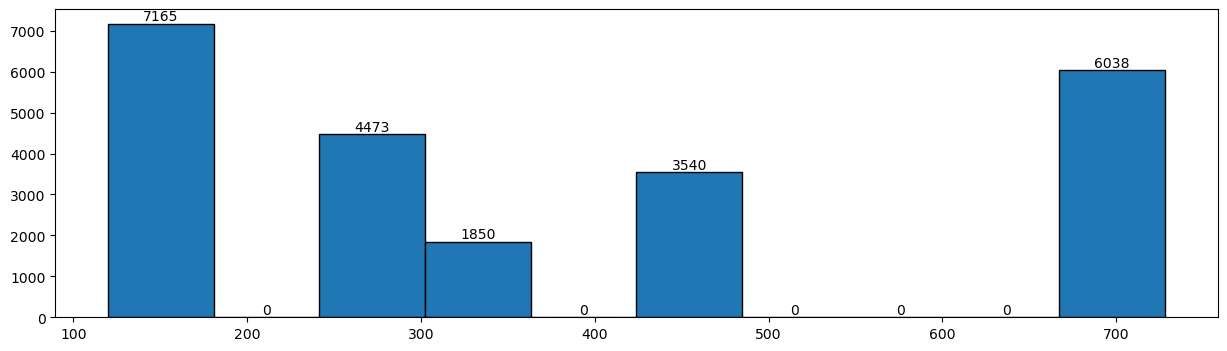

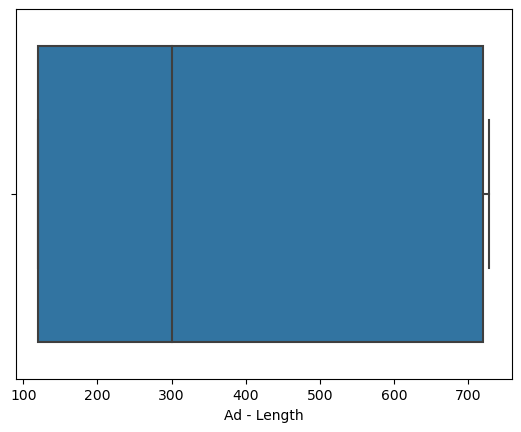

Description of Ad- Width
----------------------------------------------------------------------------
count    23066.000000
mean       337.896037
std        203.092885
min         70.000000
25%        250.000000
50%        300.000000
75%        600.000000
max        600.000000
Name: Ad- Width, dtype: float64 Distribution of Ad- Width
----------------------------------------------------------------------------
BoxPlot of Ad- Width
----------------------------------------------------------------------------


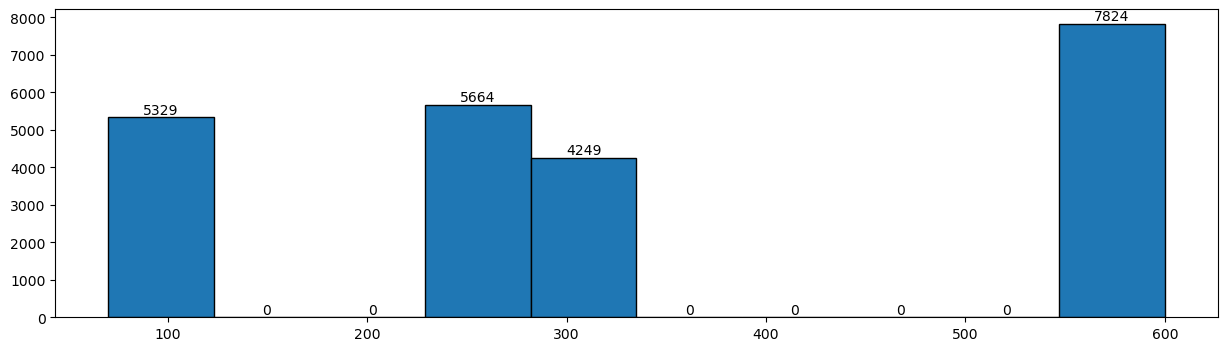

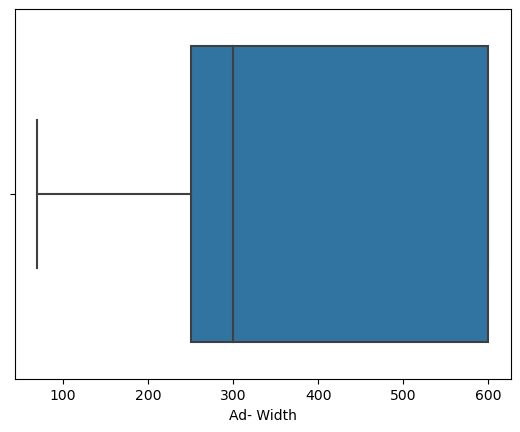

Description of Ad Size
----------------------------------------------------------------------------
count     23066.000000
mean      96674.468048
std       61538.329557
min       33600.000000
25%       72000.000000
50%       72000.000000
75%       84000.000000
max      216000.000000
Name: Ad Size, dtype: float64 Distribution of Ad Size
----------------------------------------------------------------------------
BoxPlot of Ad Size
----------------------------------------------------------------------------


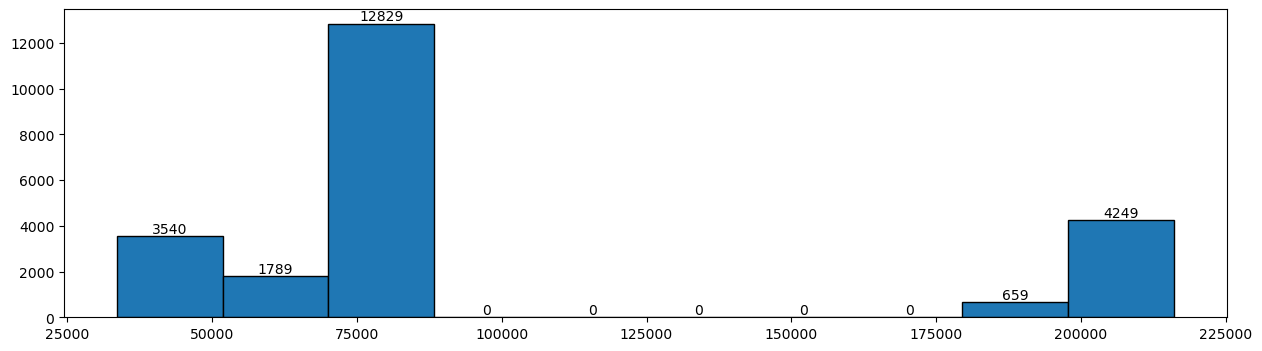

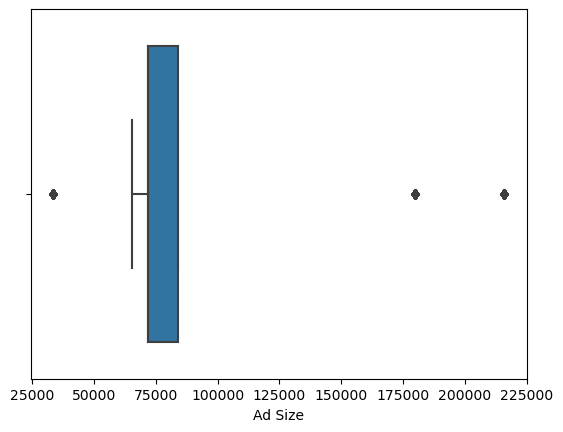

Description of Available_Impressions
----------------------------------------------------------------------------
count    2.306600e+04
mean     2.432044e+06
std      4.742888e+06
min      1.000000e+00
25%      3.367225e+04
50%      4.837710e+05
75%      2.527712e+06
max      2.759286e+07
Name: Available_Impressions, dtype: float64 Distribution of Available_Impressions
----------------------------------------------------------------------------
BoxPlot of Available_Impressions
----------------------------------------------------------------------------


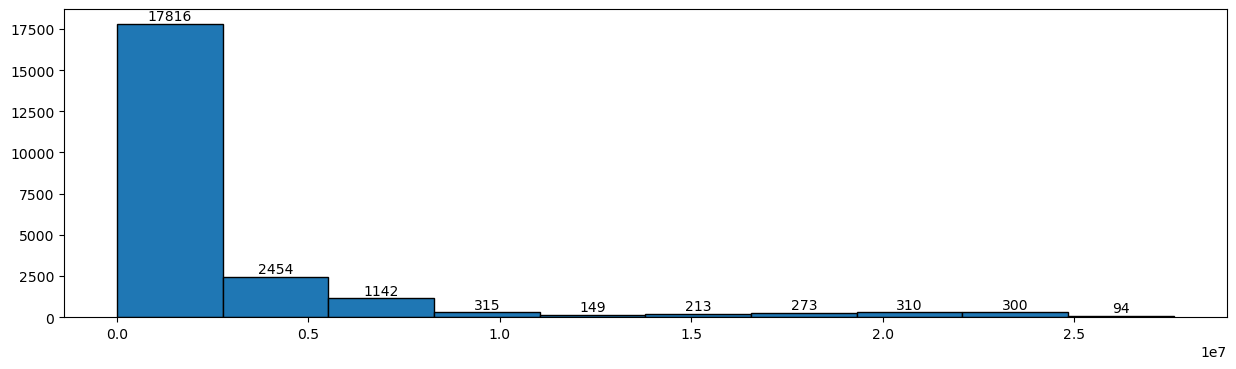

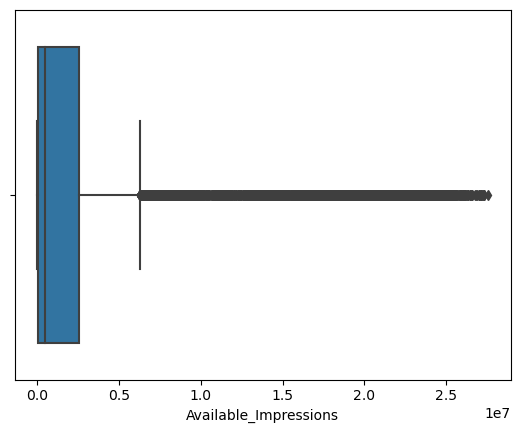

Description of Matched_Queries
----------------------------------------------------------------------------
count    2.306600e+04
mean     1.295099e+06
std      2.512970e+06
min      1.000000e+00
25%      1.828250e+04
50%      2.580875e+05
75%      1.180700e+06
max      1.470202e+07
Name: Matched_Queries, dtype: float64 Distribution of Matched_Queries
----------------------------------------------------------------------------
BoxPlot of Matched_Queries
----------------------------------------------------------------------------


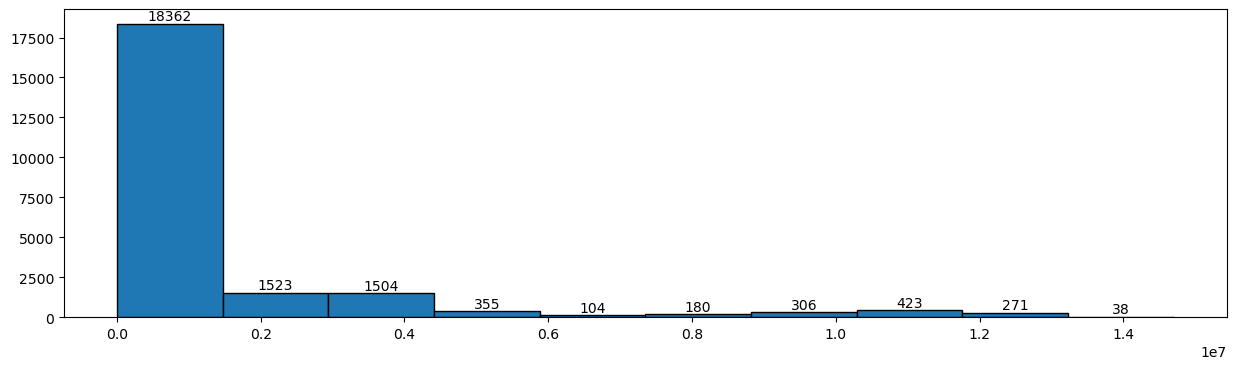

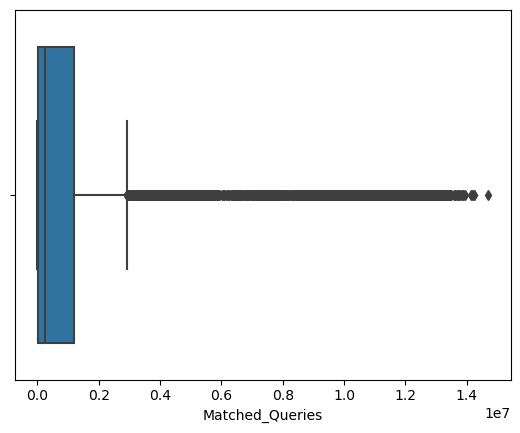

Description of Impressions
----------------------------------------------------------------------------
count    2.306600e+04
mean     1.241520e+06
std      2.429400e+06
min      1.000000e+00
25%      7.990500e+03
50%      2.252900e+05
75%      1.112428e+06
max      1.419477e+07
Name: Impressions, dtype: float64 Distribution of Impressions
----------------------------------------------------------------------------
BoxPlot of Impressions
----------------------------------------------------------------------------


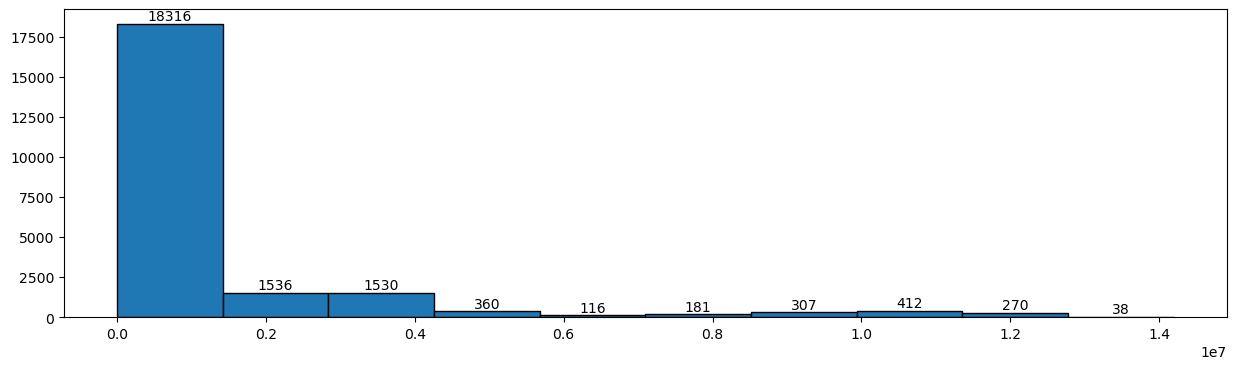

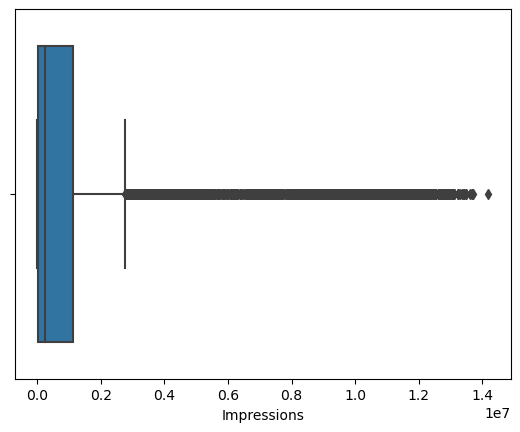

Description of Clicks
----------------------------------------------------------------------------
count     23066.000000
mean      10678.518816
std       17353.409363
min           1.000000
25%         710.000000
50%        4425.000000
75%       12793.750000
max      143049.000000
Name: Clicks, dtype: float64 Distribution of Clicks
----------------------------------------------------------------------------
BoxPlot of Clicks
----------------------------------------------------------------------------


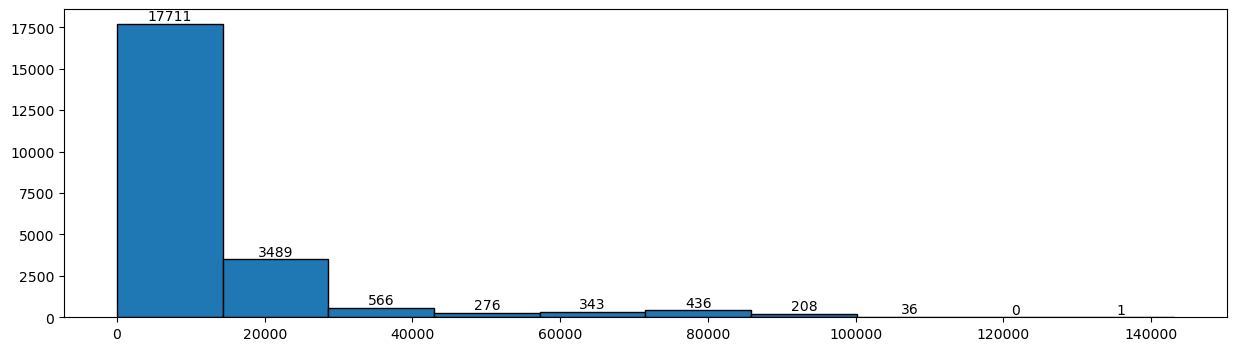

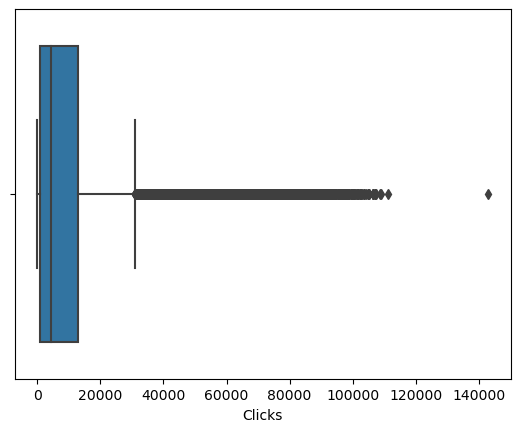

Description of Spend
----------------------------------------------------------------------------
count    23066.000000
mean      2706.625689
std       4067.927273
min          0.000000
25%         85.180000
50%       1425.125000
75%       3121.400000
max      26931.870000
Name: Spend, dtype: float64 Distribution of Spend
----------------------------------------------------------------------------
BoxPlot of Spend
----------------------------------------------------------------------------


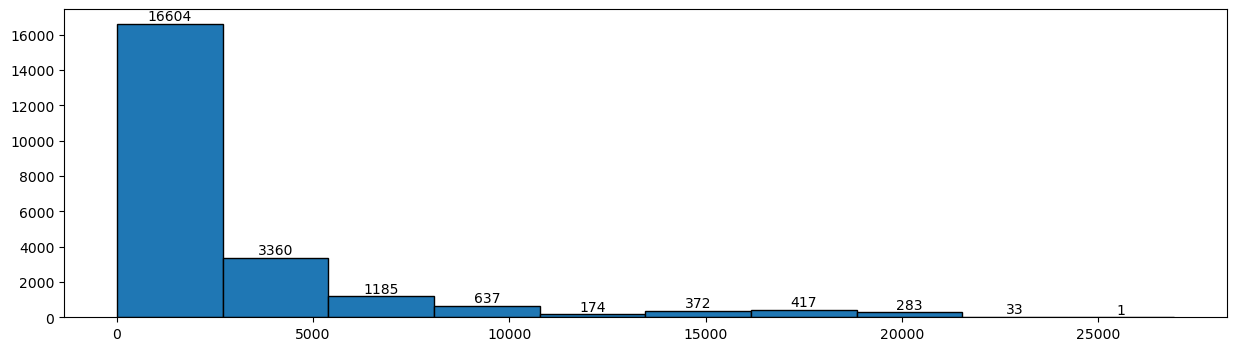

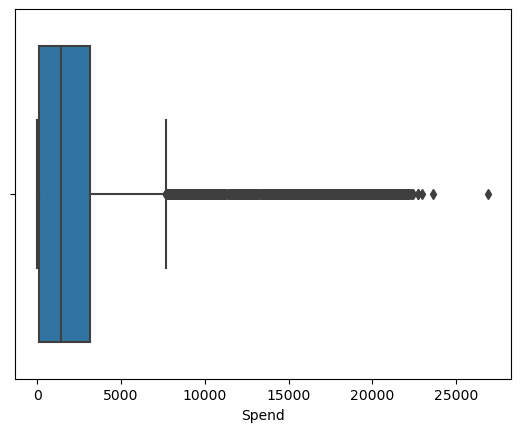

Description of Fee
----------------------------------------------------------------------------
count    23066.000000
mean         0.335123
std          0.031963
min          0.210000
25%          0.330000
50%          0.350000
75%          0.350000
max          0.350000
Name: Fee, dtype: float64 Distribution of Fee
----------------------------------------------------------------------------
BoxPlot of Fee
----------------------------------------------------------------------------


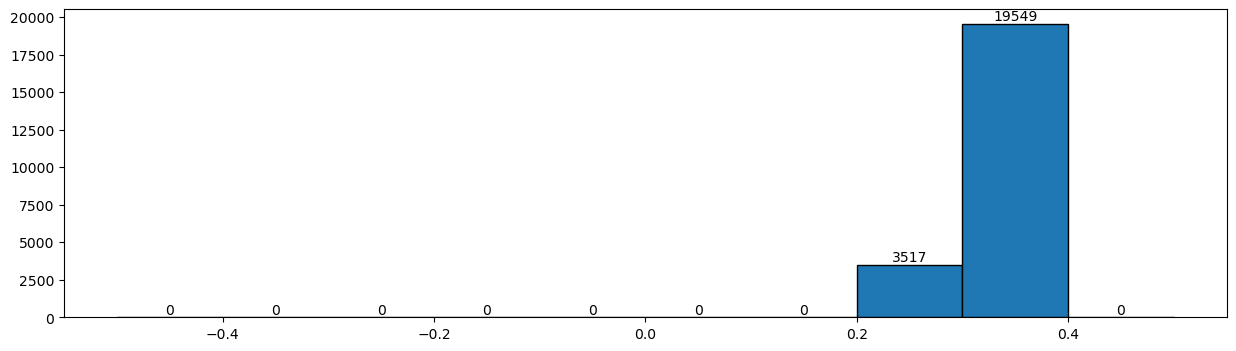

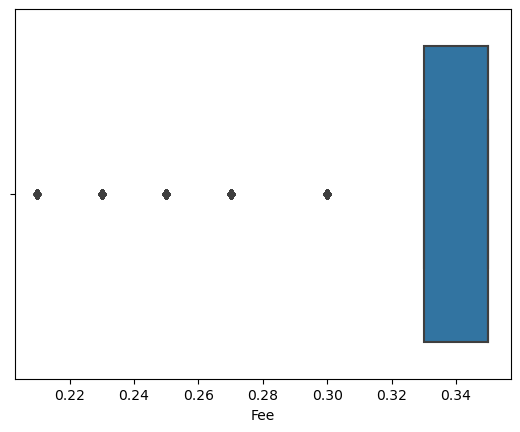

Description of Revenue
----------------------------------------------------------------------------
count    23066.000000
mean      1924.252331
std       3105.238410
min          0.000000
25%         55.365375
50%        926.335000
75%       2091.338150
max      21276.180000
Name: Revenue, dtype: float64 Distribution of Revenue
----------------------------------------------------------------------------
BoxPlot of Revenue
----------------------------------------------------------------------------


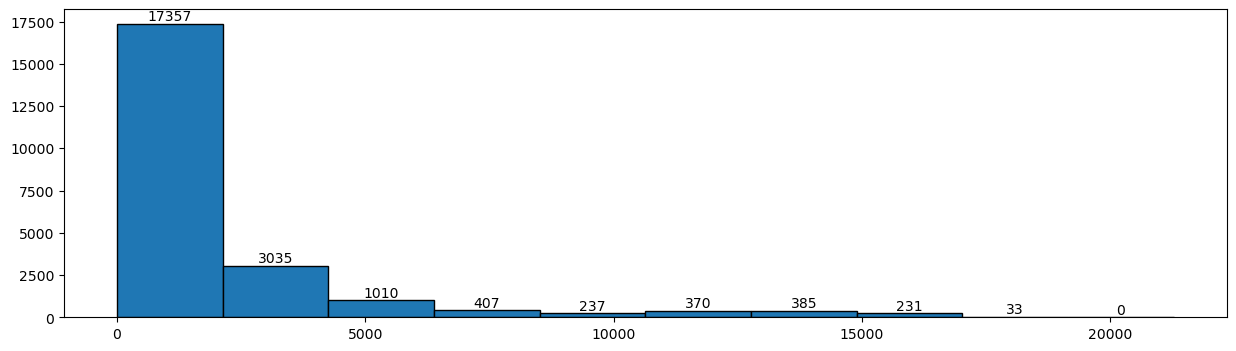

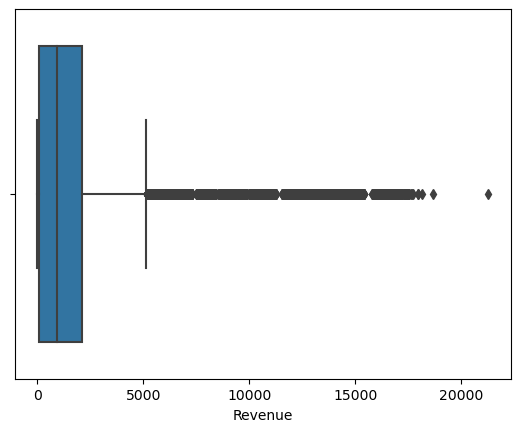

Description of CTR
----------------------------------------------------------------------------
count    23066.000000
mean         8.409941
std          9.262048
min          0.010874
25%          0.265107
50%          9.391248
75%         13.470571
max        200.000000
Name: CTR, dtype: float64 Distribution of CTR
----------------------------------------------------------------------------
BoxPlot of CTR
----------------------------------------------------------------------------


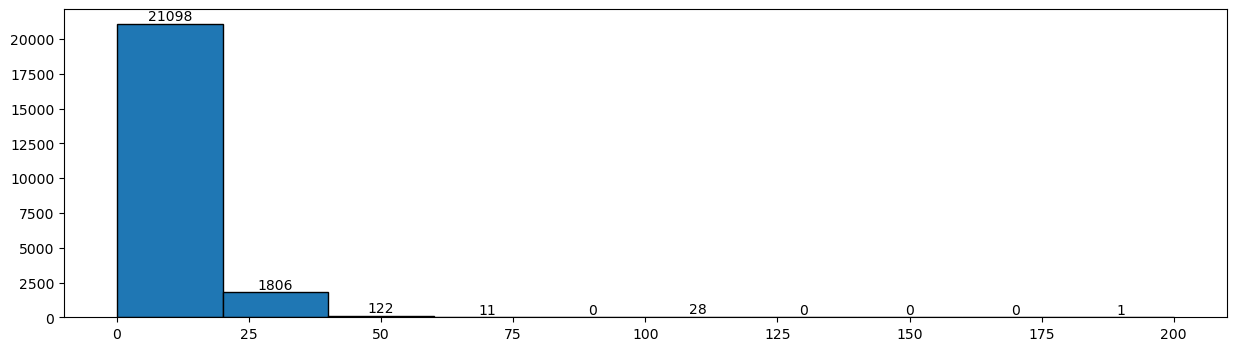

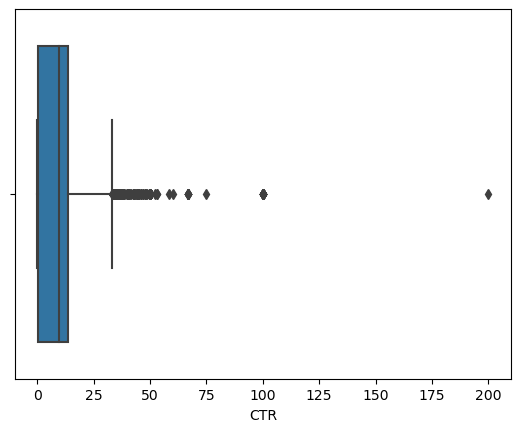

Description of CPM
----------------------------------------------------------------------------
count    23066.000000
mean         8.396849
std          9.057760
min          0.000000
25%          1.749084
50%          8.371566
75%         13.042018
max        715.000000
Name: CPM, dtype: float64 Distribution of CPM
----------------------------------------------------------------------------
BoxPlot of CPM
----------------------------------------------------------------------------


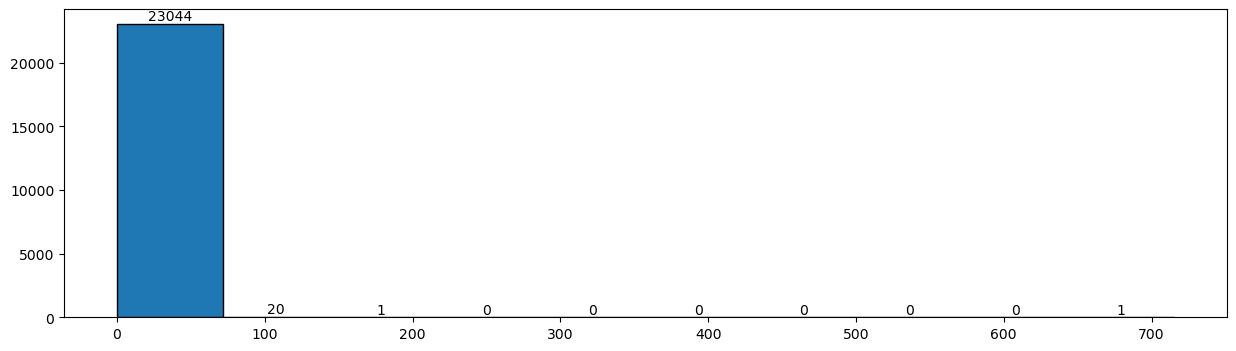

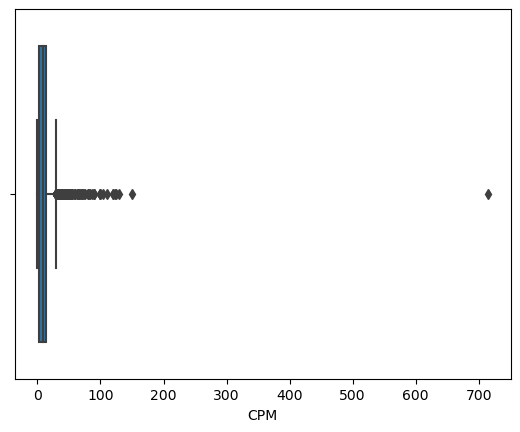

Description of CPC
----------------------------------------------------------------------------
count    23066.000000
mean         0.336678
std          0.341253
min          0.000000
25%          0.089736
50%          0.139347
75%          0.546242
max          7.264000
Name: CPC, dtype: float64 Distribution of CPC
----------------------------------------------------------------------------
BoxPlot of CPC
----------------------------------------------------------------------------


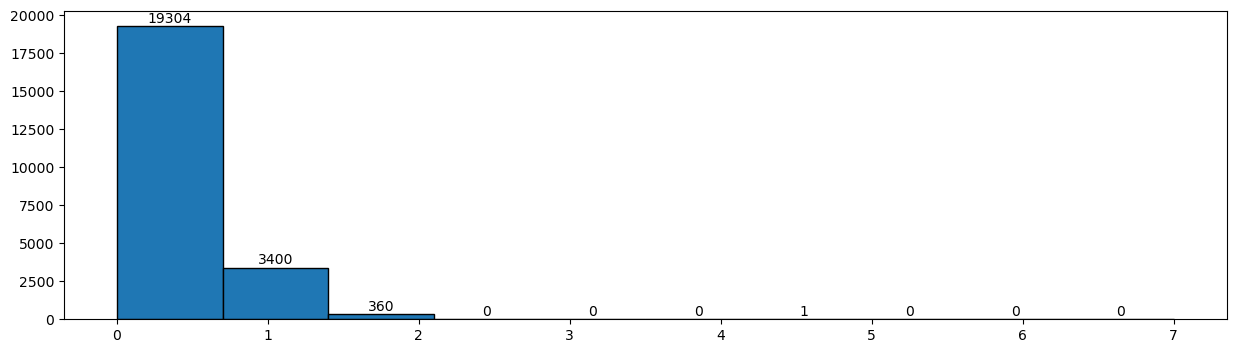

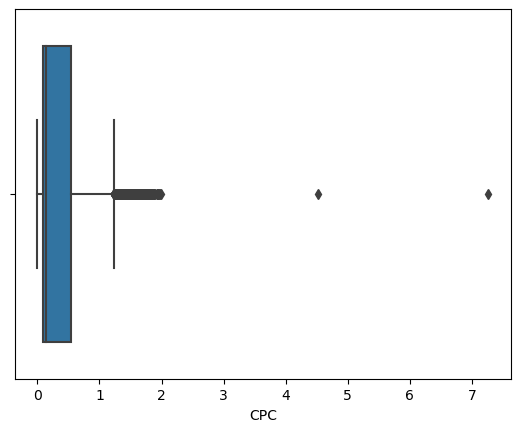

In [41]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,10)

Ad - Length
Skew : 0.33


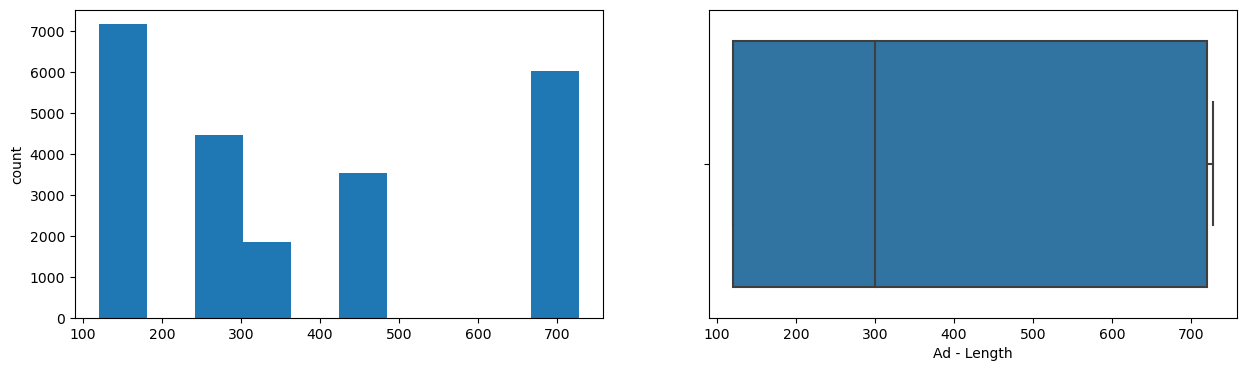

Ad- Width
Skew : 0.21


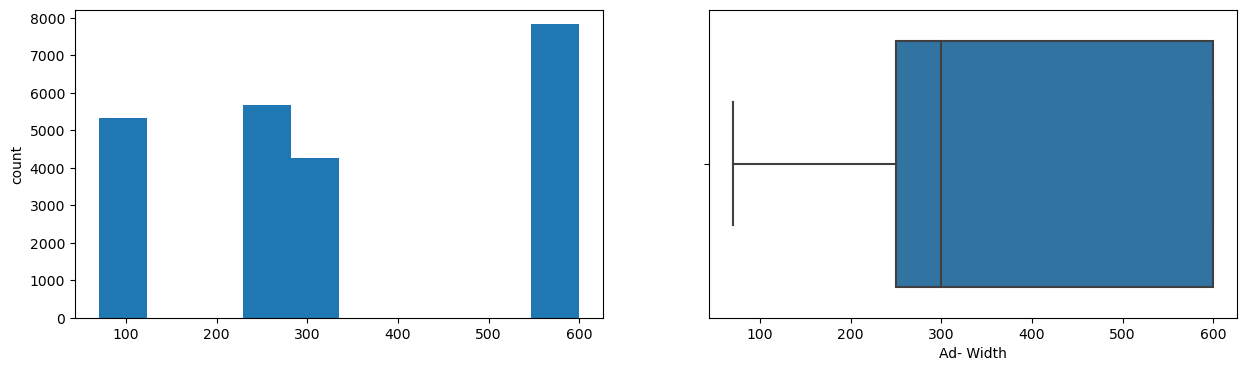

Ad Size
Skew : 1.21


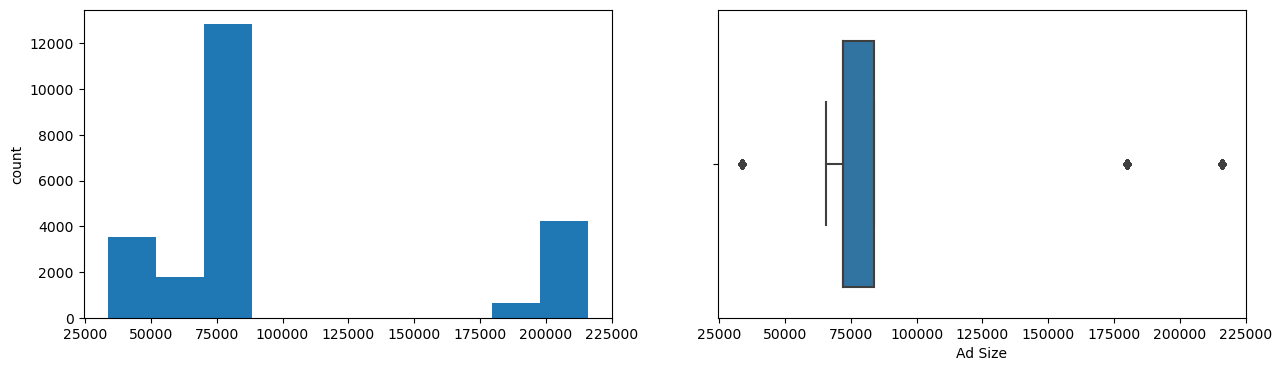

Available_Impressions
Skew : 3.07


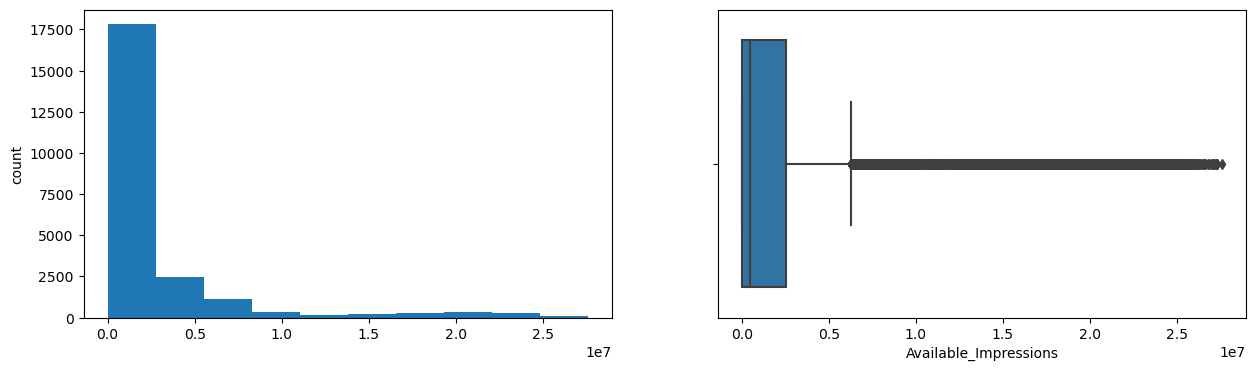

Matched_Queries
Skew : 2.98


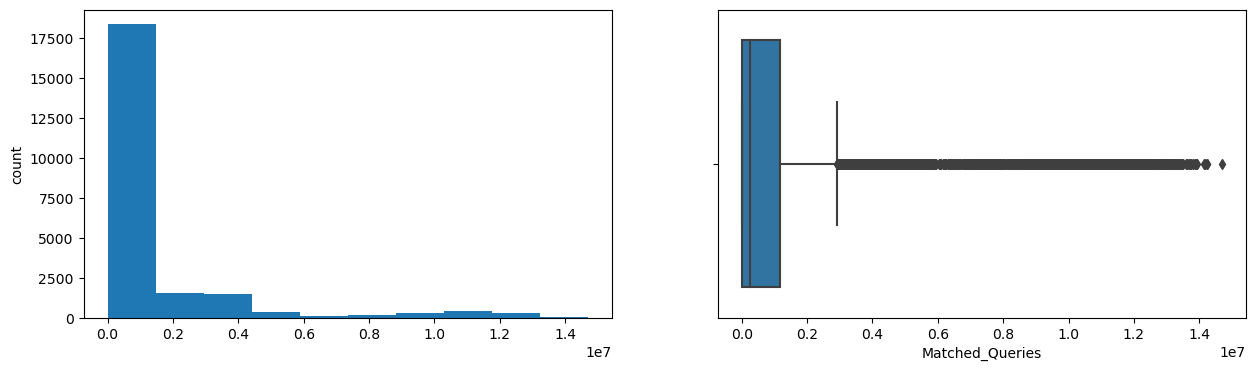

Impressions
Skew : 2.97


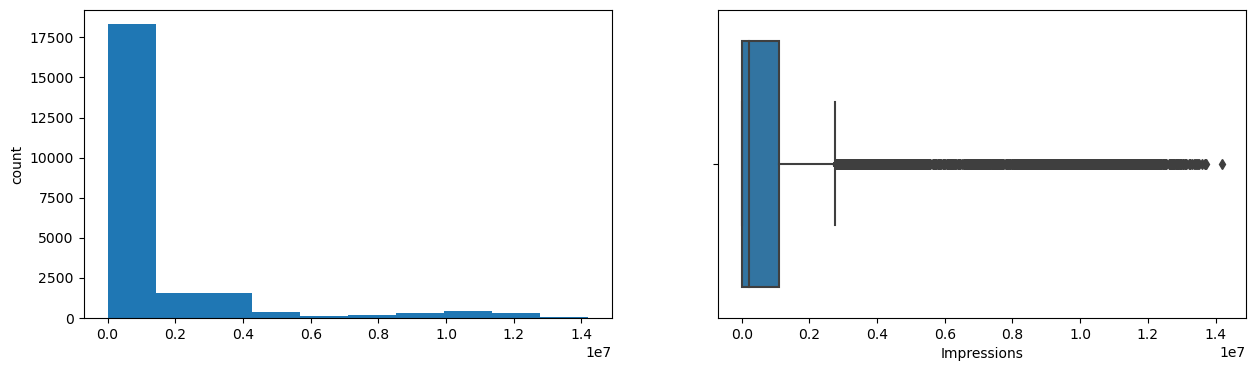

Clicks
Skew : 2.94


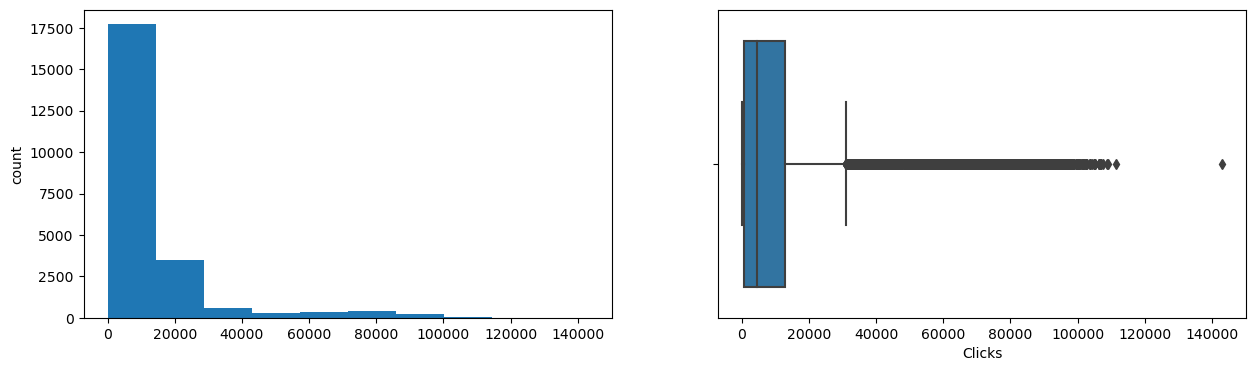

Spend
Skew : 2.58


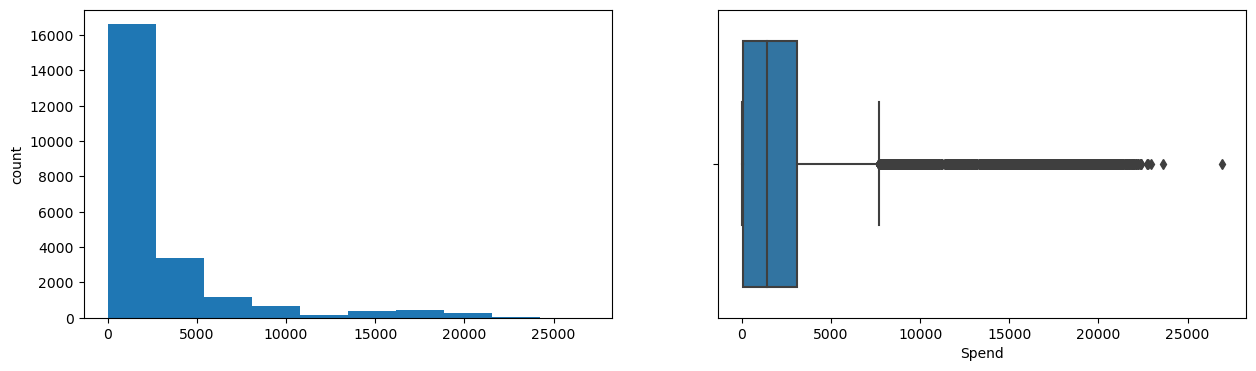

Fee
Skew : -2.3


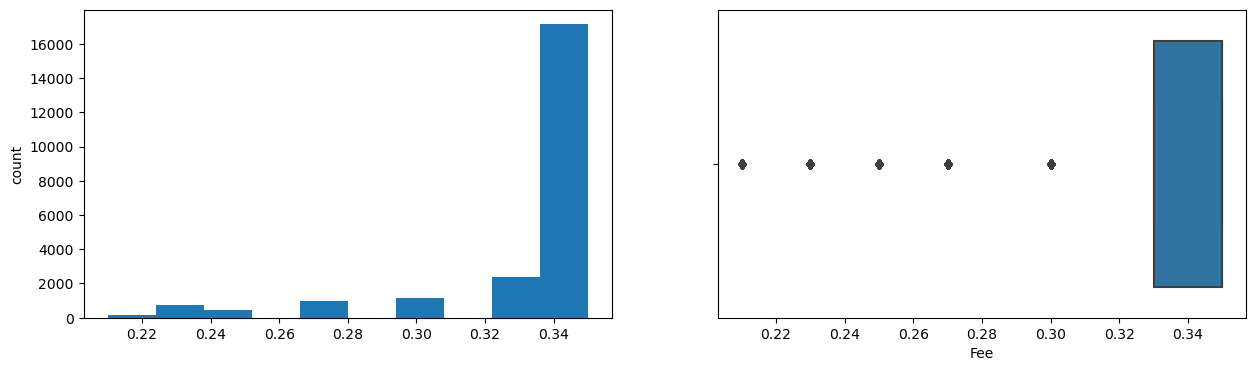

Revenue
Skew : 2.79


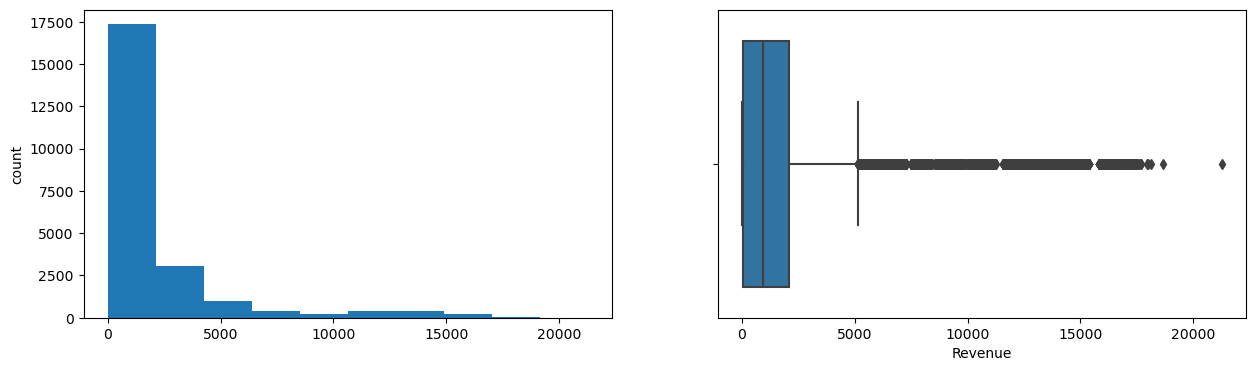

CTR
Skew : 2.44


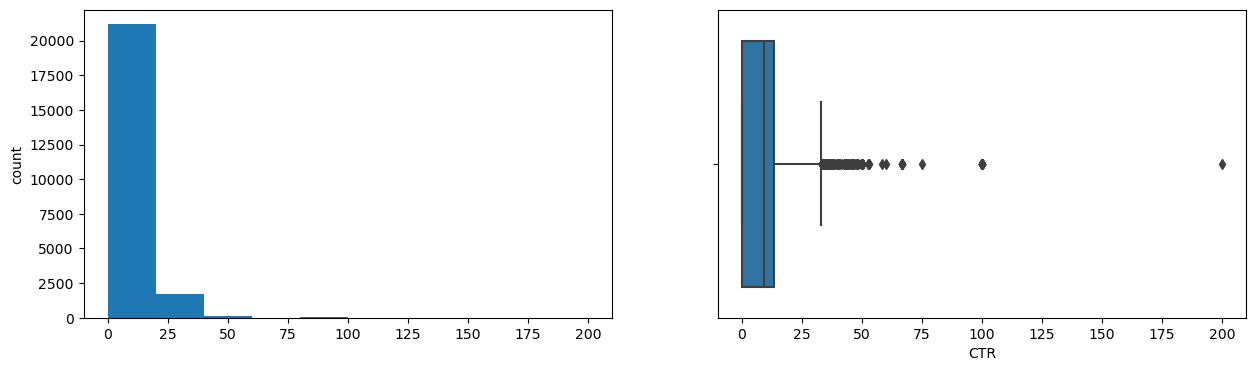

CPM
Skew : 22.32


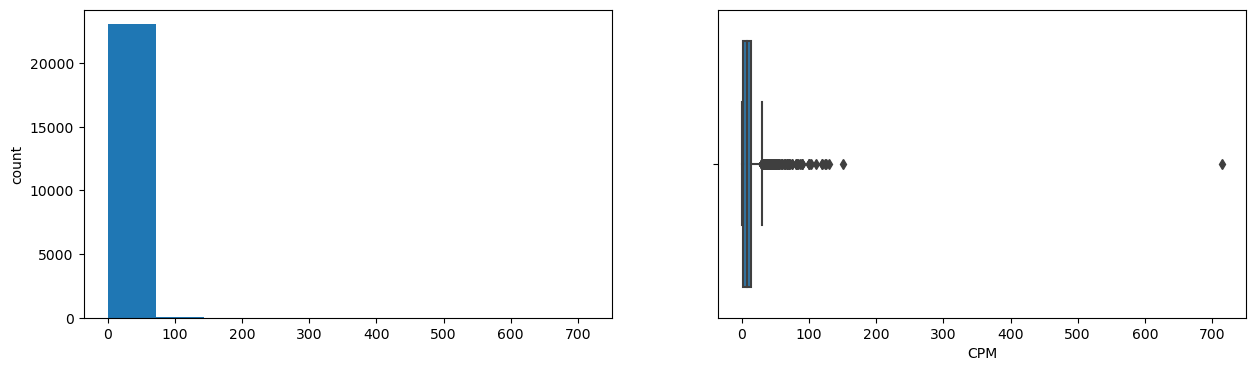

CPC
Skew : 1.84


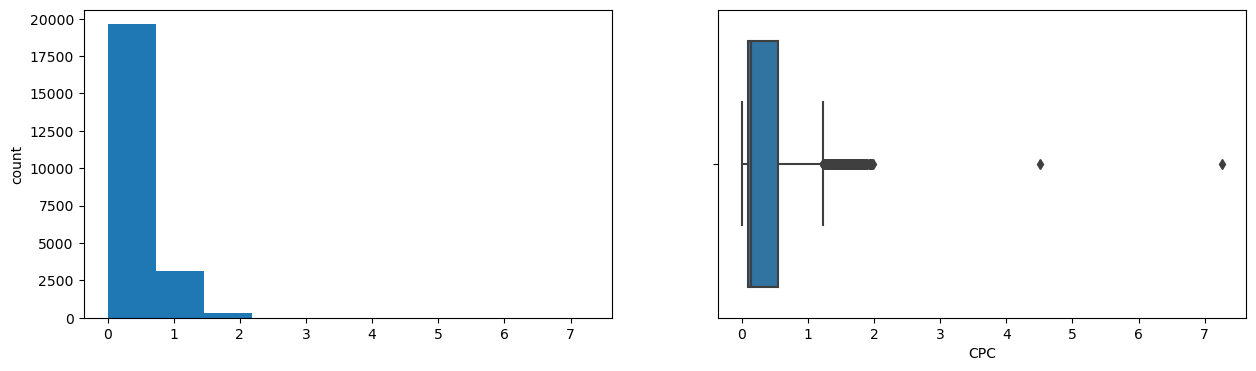

In [39]:
for col in df_num.columns:
    print(col)
    print('Skew :',round(df_num[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df_num[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df_num[col])
    plt.show()

In [22]:
df_cat = df.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['Timestamp', 'InventoryType', 'Ad Type', 'Platform', 'Device Type', 'Format']

In [23]:
df_cat

,Timestamp,InventoryType,Ad Type,Platform,Device Type,Format
0,2020-9-2-17,Format1,Inter222,Video,Desktop,Display
1,2020-9-2-10,Format1,Inter227,App,Mobile,Video
2,2020-9-1-22,Format1,Inter222,Video,Desktop,Display
3,2020-9-3-20,Format1,Inter228,Video,Mobile,Video
4,2020-9-4-15,Format1,Inter217,Web,Desktop,Video
...,...,...,...,...,...,...
23061,2020-9-13-7,Format5,Inter220,Web,Mobile,Video
23062,2020-11-2-7,Format5,Inter224,Web,Desktop,Video
23063,2020-9-14-22,Format5,Inter218,App,Mobile,Video
23064,2020-11-18-2,Format4,inter230,Video,Mobile,Video


In [24]:
del lstcatcolumns[0]

In [25]:
lstcatcolumns

['InventoryType', 'Ad Type', 'Platform', 'Device Type', 'Format']

In [44]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure()
    plt.figure(figsize=(6,4))
    plots = df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    for bar in plots.patches:
        plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 10),
                   textcoords='offset points')
    plt.show()
    print("       ")

Details of InventoryType
----------------------------------------------------------------
Format4    7165
Format5    4249
Format1    3814
Format3    3540
Format6    1850
Format2    1789
Format7     659
Name: InventoryType, dtype: int64


<Figure size 640x480 with 0 Axes>

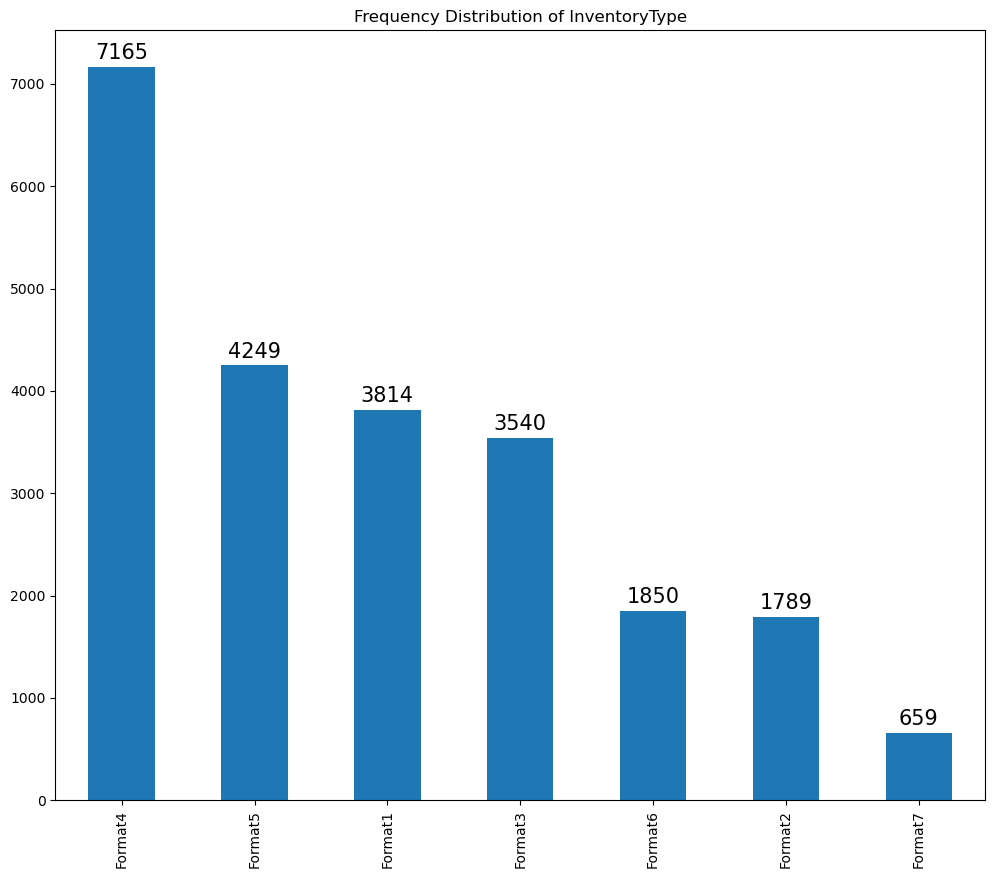

       
Details of Ad Type
----------------------------------------------------------------
Inter224    1658
Inter217    1655
Inter223    1654
Inter219    1650
Inter221    1650
Inter222    1649
Inter229    1648
Inter227    1647
Inter218    1645
inter230    1644
Inter220    1644
Inter225    1643
Inter226    1640
Inter228    1639
Name: Ad Type, dtype: int64


<Figure size 640x480 with 0 Axes>

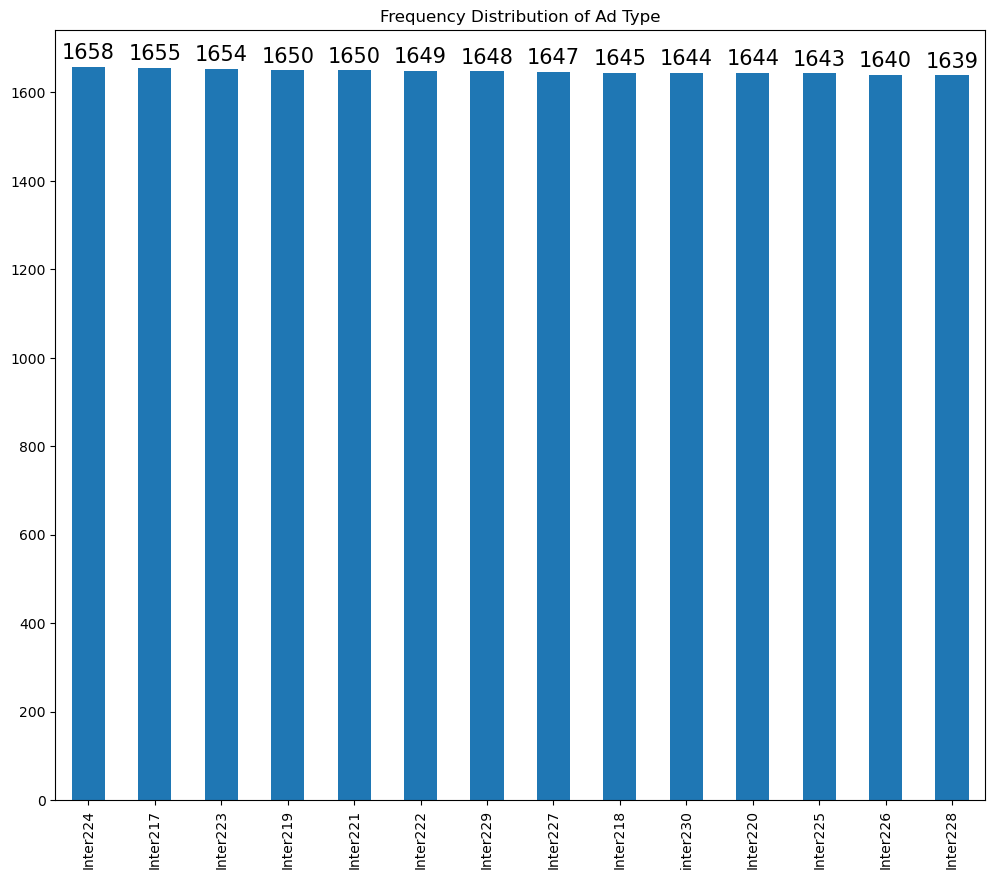

       
Details of Platform
----------------------------------------------------------------
Video    9873
Web      8251
App      4942
Name: Platform, dtype: int64


<Figure size 640x480 with 0 Axes>

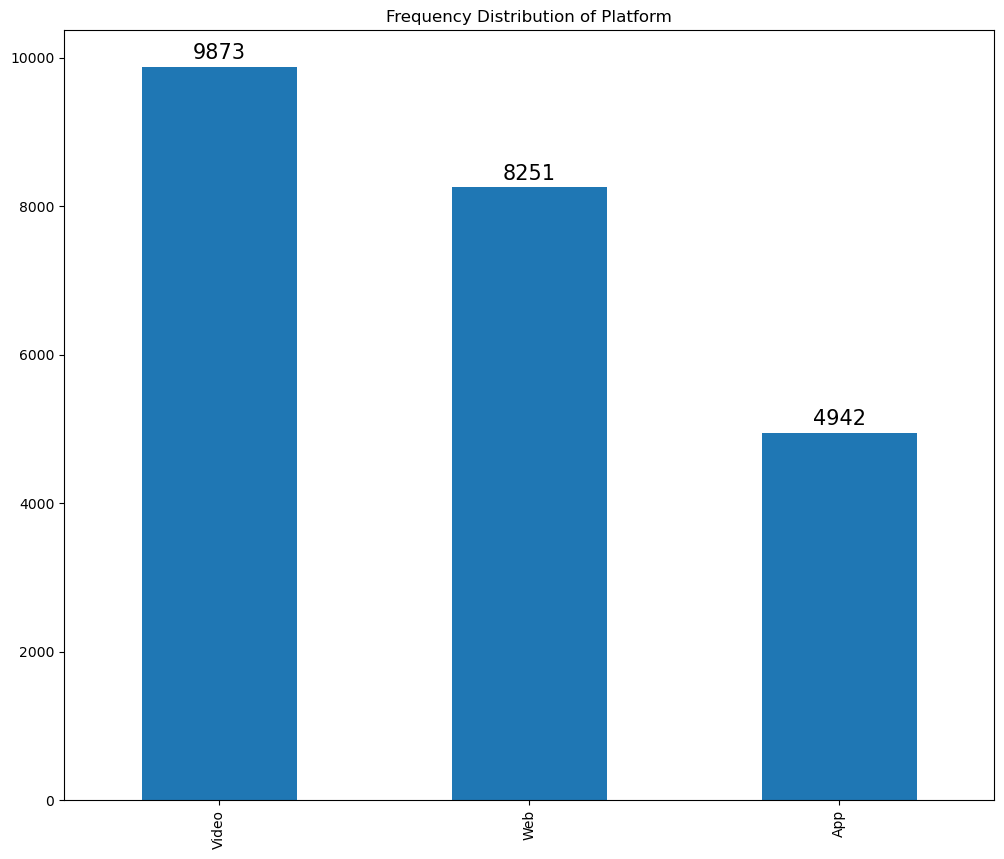

       
Details of Device Type
----------------------------------------------------------------
Mobile     14806
Desktop     8260
Name: Device Type, dtype: int64


<Figure size 640x480 with 0 Axes>

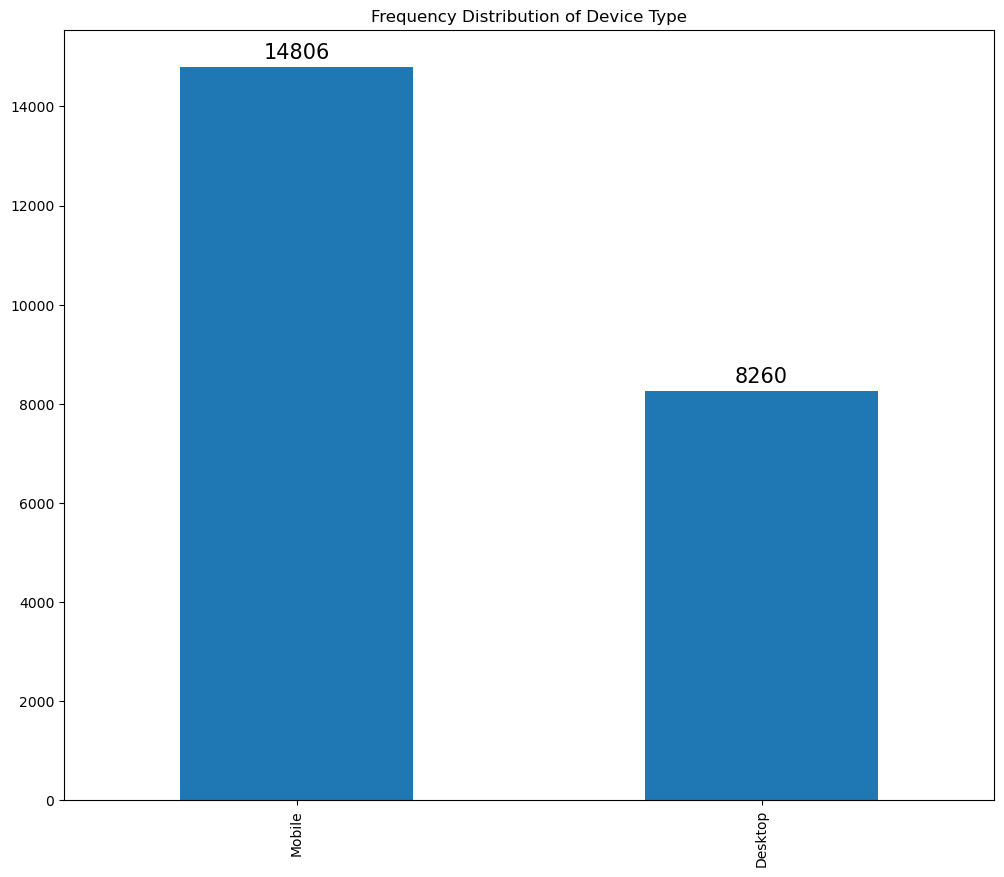

       
Details of Format
----------------------------------------------------------------
Video      11552
Display    11514
Name: Format, dtype: int64


<Figure size 640x480 with 0 Axes>

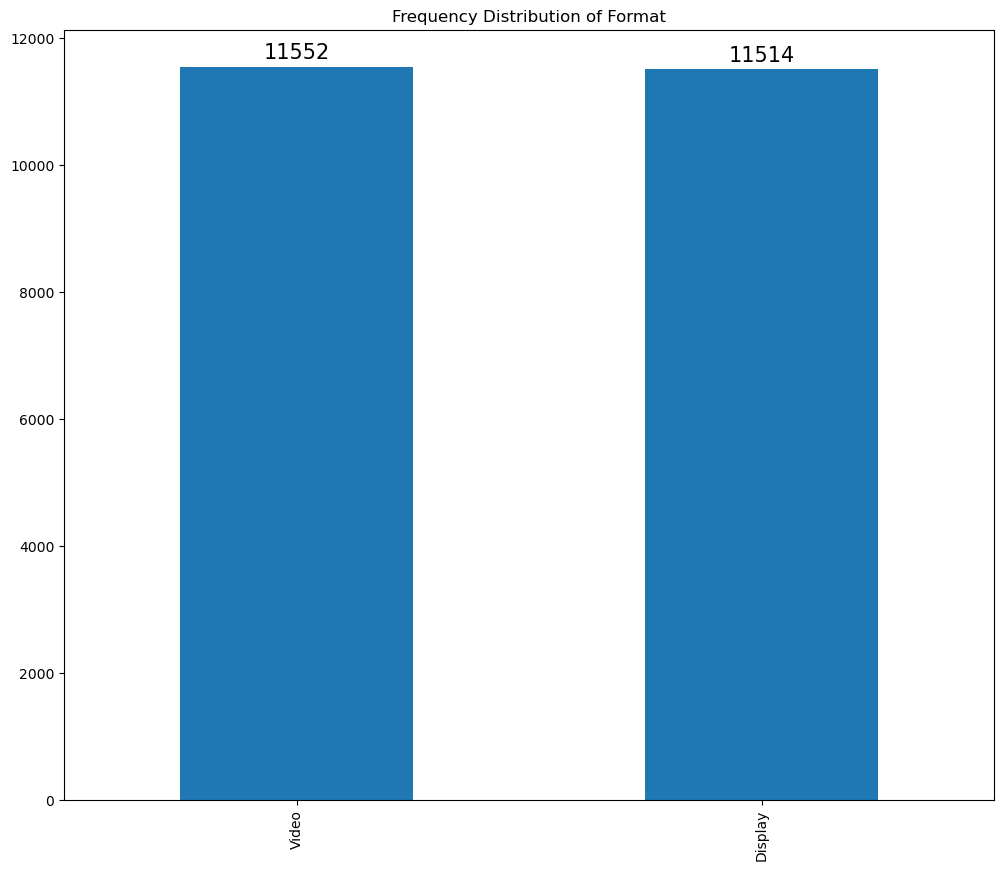

In [27]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

#### Bivariate Analysis

In [28]:
corr = df_num.corr(method='pearson')

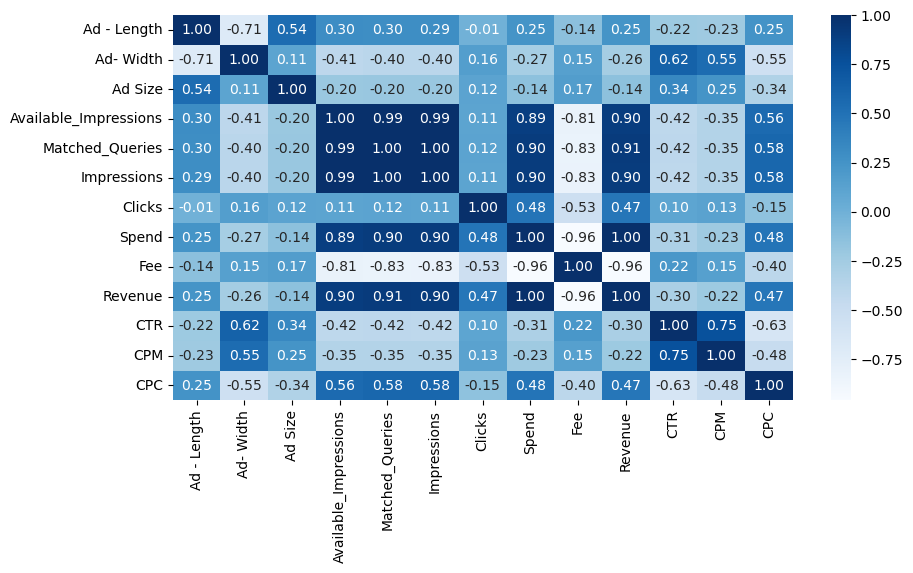

In [46]:
fig = plt.subplots(figsize=(10, 5))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f', cmap= 'Blues')
plt.show()

In [ ]:
plt.figure(figsize=[20, 10])
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap = 'Blues');

### Categorical to numerical variable conversion

In [48]:
df_new = pd.DataFrame()

In [49]:
df_new['InventoryType'] = df['InventoryType'].astype('category').cat.codes
df_new['AdType'] = df['Ad Type'].astype('category').cat.codes
df_new['Platform'] = df['Platform'].astype('category').cat.codes
df_new['DeviceType'] = df['Device Type'].astype('category').cat.codes
df_new['Format'] = df['Format'].astype('category').cat.codes

In [50]:
df_new

,InventoryType,AdType,Platform,DeviceType,Format
0,0,5,1,0,0
1,0,10,0,1,1
2,0,5,1,0,0
3,0,11,1,1,1
4,0,0,2,0,1
...,...,...,...,...,...
23061,4,3,2,1,1
23062,4,7,2,0,1
23063,4,1,0,1,1
23064,3,13,1,1,1


In [51]:
concatenated_df = pd.concat([df_num, df_new], axis=1)


In [52]:
concatenated_df.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,InventoryType,AdType,Platform,DeviceType,Format
0,300,250,75000,1806,325,323,1,0.0,0.35,0.0,0.309598,0.0,0.0,0,5,1,0,0
1,300,250,75000,1780,285,285,1,0.0,0.35,0.0,0.350877,0.0,0.0,0,10,0,1,1
2,300,250,75000,2727,356,355,1,0.0,0.35,0.0,0.281690,0.0,0.0,0,5,1,0,0
3,300,250,75000,2430,497,495,1,0.0,0.35,0.0,0.202020,0.0,0.0,0,11,1,1,1
4,300,250,75000,1218,242,242,1,0.0,0.35,0.0,0.413223,0.0,0.0,0,0,2,0,1


In [53]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ad - Length            23066 non-null  int64  
 1   Ad- Width              23066 non-null  int64  
 2   Ad Size                23066 non-null  int64  
 3   Available_Impressions  23066 non-null  int64  
 4   Matched_Queries        23066 non-null  int64  
 5   Impressions            23066 non-null  int64  
 6   Clicks                 23066 non-null  int64  
 7   Spend                  23066 non-null  float64
 8   Fee                    23066 non-null  float64
 9   Revenue                23066 non-null  float64
 10  CTR                    23066 non-null  float64
 11  CPM                    23066 non-null  float64
 12  CPC                    23066 non-null  float64
 13  InventoryType          23066 non-null  int8   
 14  AdType                 23066 non-null  int8   
 15  Pl

# Outlier 

In [54]:
concatenated_df.columns

Index(['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC', 'InventoryType', 'AdType', 'Platform',
       'DeviceType', 'Format'],
      dtype='object')

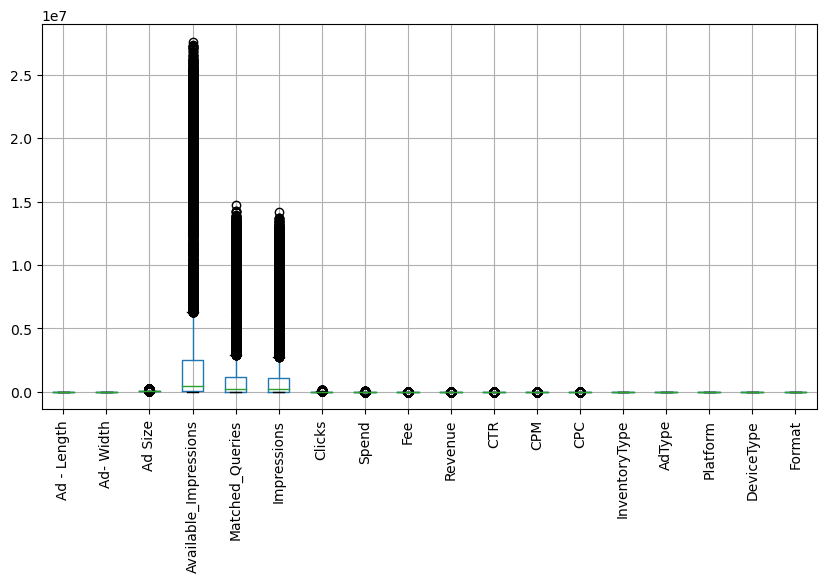

In [58]:
concatenated_df.boxplot(figsize=(10,5))
plt.xticks(rotation=90)
plt.show()

The description statistics for 'Ad - Length' column is:


count    23066.000000
mean       385.163097
std        233.651434
min        120.000000
25%        120.000000
50%        300.000000
75%        720.000000
max        728.000000
Name: Ad - Length, dtype: float64


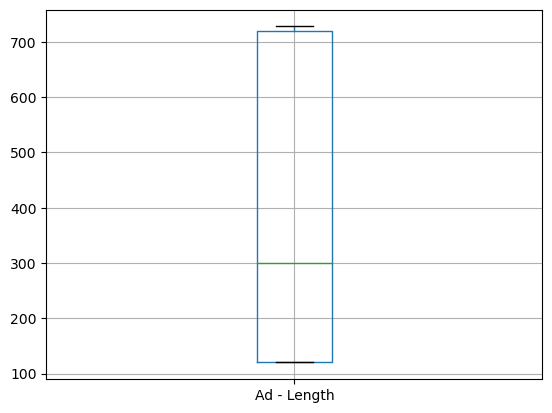

The description statistics for 'Ad- Width' column is:


count    23066.000000
mean       337.896037
std        203.092885
min         70.000000
25%        250.000000
50%        300.000000
75%        600.000000
max        600.000000
Name: Ad- Width, dtype: float64


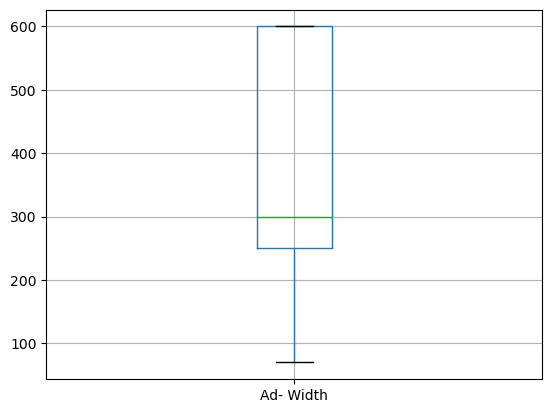

The description statistics for 'Ad Size' column is:


count     23066.000000
mean      96674.468048
std       61538.329557
min       33600.000000
25%       72000.000000
50%       72000.000000
75%       84000.000000
max      216000.000000
Name: Ad Size, dtype: float64


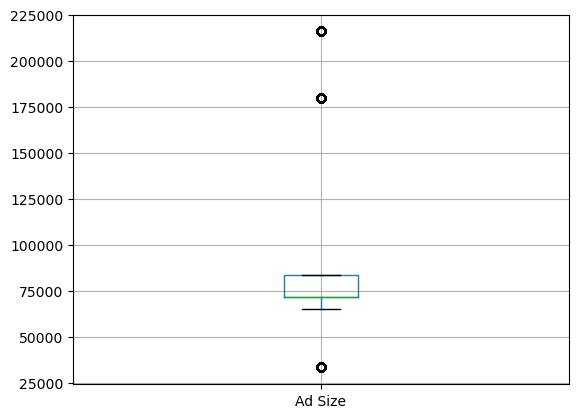

The description statistics for 'Available_Impressions' column is:


count    2.306600e+04
mean     2.432044e+06
std      4.742888e+06
min      1.000000e+00
25%      3.367225e+04
50%      4.837710e+05
75%      2.527712e+06
max      2.759286e+07
Name: Available_Impressions, dtype: float64


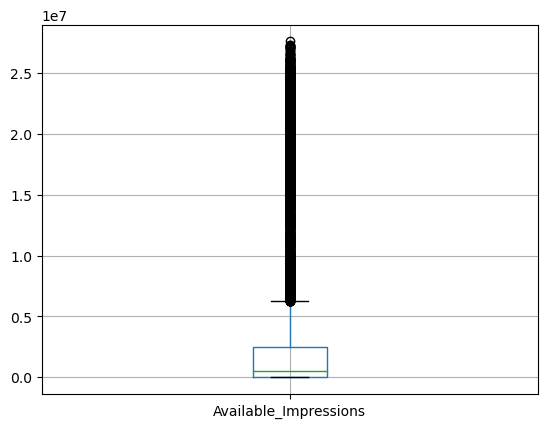

The description statistics for 'Matched_Queries' column is:


count    2.306600e+04
mean     1.295099e+06
std      2.512970e+06
min      1.000000e+00
25%      1.828250e+04
50%      2.580875e+05
75%      1.180700e+06
max      1.470202e+07
Name: Matched_Queries, dtype: float64


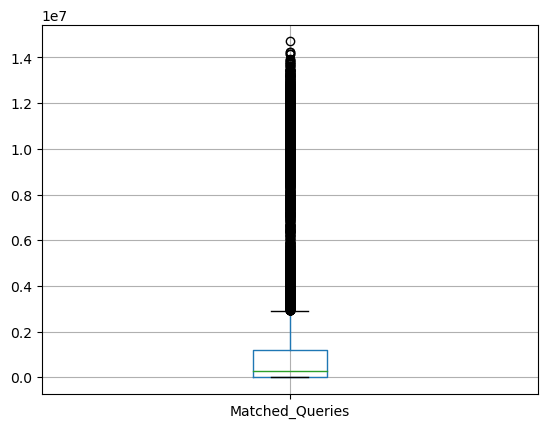

The description statistics for 'Impressions' column is:


count    2.306600e+04
mean     1.241520e+06
std      2.429400e+06
min      1.000000e+00
25%      7.990500e+03
50%      2.252900e+05
75%      1.112428e+06
max      1.419477e+07
Name: Impressions, dtype: float64


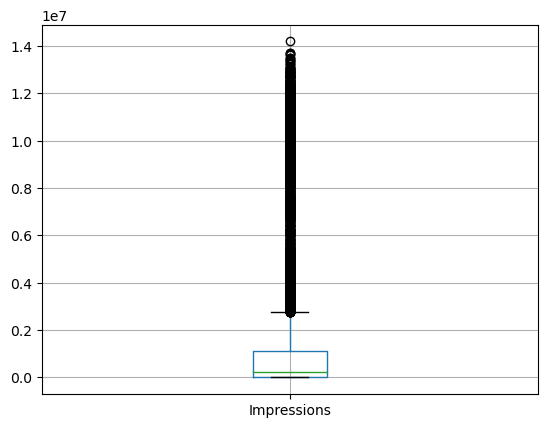

The description statistics for 'Clicks' column is:


count     23066.000000
mean      10678.518816
std       17353.409363
min           1.000000
25%         710.000000
50%        4425.000000
75%       12793.750000
max      143049.000000
Name: Clicks, dtype: float64


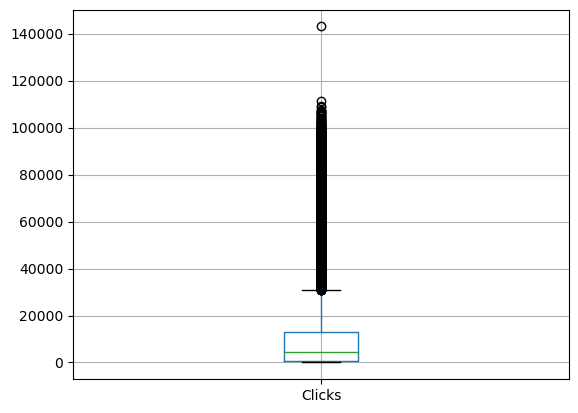

The description statistics for 'Spend' column is:


count    23066.000000
mean      2706.625689
std       4067.927273
min          0.000000
25%         85.180000
50%       1425.125000
75%       3121.400000
max      26931.870000
Name: Spend, dtype: float64


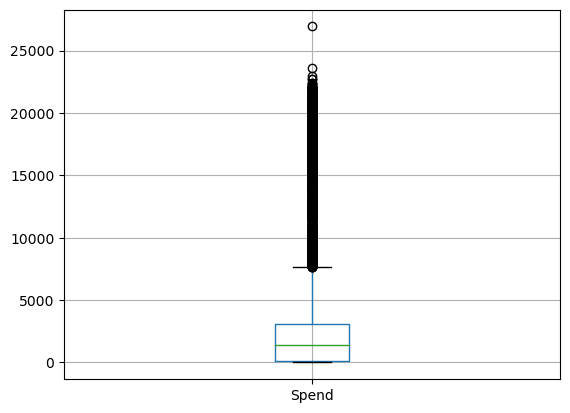

The description statistics for 'Fee' column is:


count    23066.000000
mean         0.335123
std          0.031963
min          0.210000
25%          0.330000
50%          0.350000
75%          0.350000
max          0.350000
Name: Fee, dtype: float64


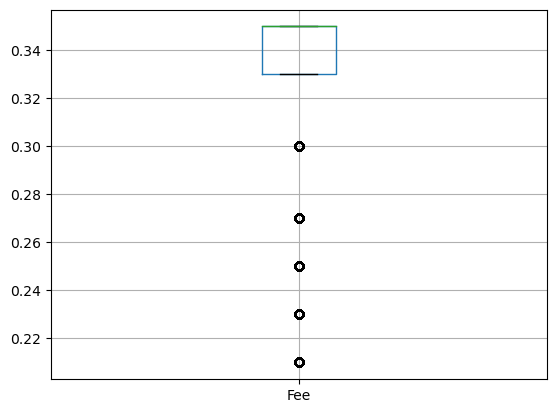

The description statistics for 'Revenue' column is:


count    23066.000000
mean      1924.252331
std       3105.238410
min          0.000000
25%         55.365375
50%        926.335000
75%       2091.338150
max      21276.180000
Name: Revenue, dtype: float64


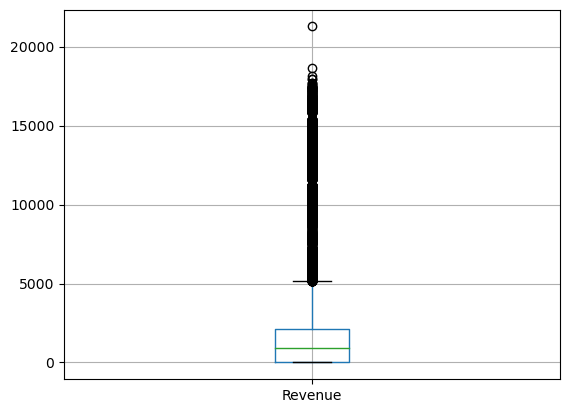

The description statistics for 'CTR' column is:


count    23066.000000
mean         8.409941
std          9.262048
min          0.010874
25%          0.265107
50%          9.391248
75%         13.470571
max        200.000000
Name: CTR, dtype: float64


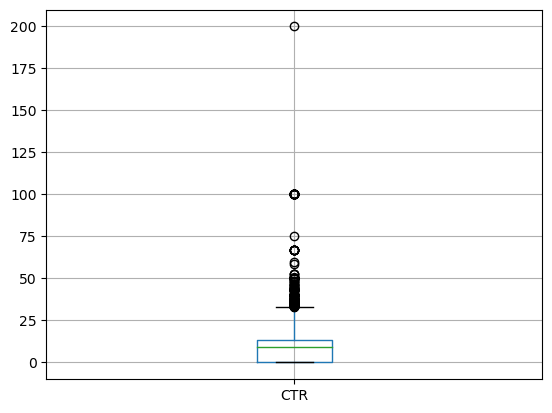

The description statistics for 'CPM' column is:


count    23066.000000
mean         8.396849
std          9.057760
min          0.000000
25%          1.749084
50%          8.371566
75%         13.042018
max        715.000000
Name: CPM, dtype: float64


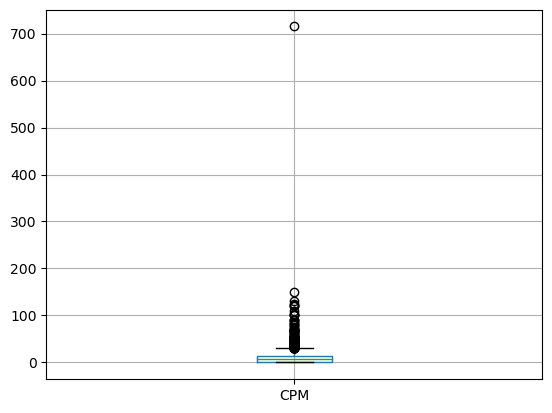

The description statistics for 'CPC' column is:


count    23066.000000
mean         0.336678
std          0.341253
min          0.000000
25%          0.089736
50%          0.139347
75%          0.546242
max          7.264000
Name: CPC, dtype: float64


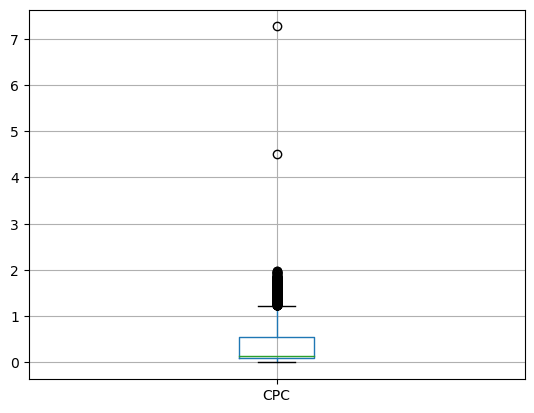

In [52]:
for i in range(0,13):
    print("The description statistics for '{}' column is:".format(lstnumericcolumns[i]))
    print('\n')
    print(concatenated_df[lstnumericcolumns[i]].describe())
    concatenated_df.boxplot(column=lstnumericcolumns[i])
    plt.show()

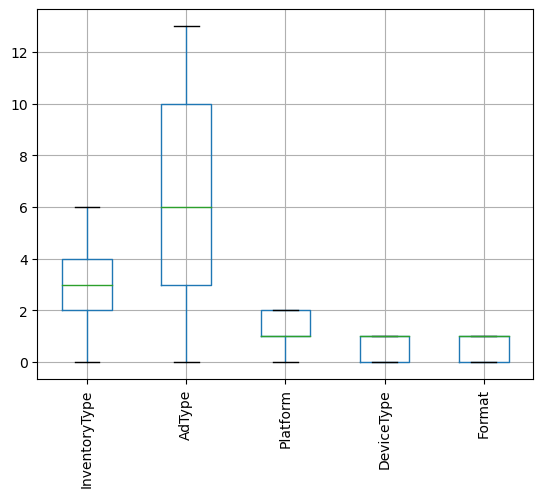

In [54]:
concatenated_df.boxplot(column=['InventoryType','AdType','Platform','DeviceType','Format'])
plt.xticks(rotation=90);
plt.show();

In [40]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

In [55]:
((concatenated_df < (Q1 - 1.5 * IQR)) | (concatenated_df > (Q3 + 1.5 * IQR))).sum()

Ad - Length                 0
Ad Size                  8448
Ad- Width                   0
AdType                      0
Available_Impressions    2378
CPC                       585
CPM                       207
CTR                       275
Clicks                   1691
DeviceType                  0
Fee                      3517
Format                      0
Impressions              3269
InventoryType               0
Matched_Queries          3192
Platform                    0
Revenue                  2325
Spend                    2081
dtype: int64

In [56]:
((concatenated_df > (Q3 + 1.5 * IQR)) & (concatenated_df < df_num.quantile(0.95))).sum()

Ad - Length                 0
Ad Size                   659
Ad- Width                   0
AdType                      0
Available_Impressions    1224
CPC                         0
CPM                         0
CTR                         0
Clicks                    537
DeviceType                  0
Fee                         0
Format                      0
Impressions              2115
InventoryType               0
Matched_Queries          2038
Platform                    0
Revenue                  1171
Spend                     927
dtype: int64

outliers are significantly larger or smaller than the majority of the data, they may have a substantial impact on the clustering results.So treating outliers is not necessary here.

# Scaling the data


In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
X = StandardScaler()

In [62]:
scaled_df = pd.DataFrame(X.fit_transform(concatenated_df),columns=concatenated_df.columns).round(2)

In [63]:
scaled_df

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,InventoryType,AdType,Platform,DeviceType,Format
0,-0.36,-0.43,-0.35,-0.51,-0.52,-0.51,-0.62,-0.67,0.47,-0.62,-0.87,-0.93,-0.99,-1.64,-0.37,-0.19,-1.34,-1.0
1,-0.36,-0.43,-0.35,-0.51,-0.52,-0.51,-0.62,-0.67,0.47,-0.62,-0.87,-0.93,-0.99,-1.64,0.87,-1.54,0.75,1.0
2,-0.36,-0.43,-0.35,-0.51,-0.52,-0.51,-0.62,-0.67,0.47,-0.62,-0.88,-0.93,-0.99,-1.64,-0.37,-0.19,-1.34,-1.0
3,-0.36,-0.43,-0.35,-0.51,-0.52,-0.51,-0.62,-0.67,0.47,-0.62,-0.89,-0.93,-0.99,-1.64,1.12,-0.19,0.75,1.0
4,-0.36,-0.43,-0.35,-0.51,-0.52,-0.51,-0.62,-0.67,0.47,-0.62,-0.86,-0.93,-0.99,-1.64,-1.61,1.15,-1.34,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,1.43,-0.19,1.94,-0.51,-0.52,-0.51,-0.62,-0.67,0.47,-0.62,9.89,6.80,-0.78,0.86,-0.87,1.15,0.75,1.0
23062,1.43,-0.19,1.94,-0.51,-0.52,-0.51,-0.62,-0.67,0.47,-0.62,4.49,1.28,-0.87,0.86,0.13,1.15,-1.34,1.0
23063,1.43,-0.19,1.94,-0.51,-0.52,-0.51,-0.62,-0.67,0.47,-0.62,9.89,4.59,-0.84,0.86,-1.36,-1.54,0.75,1.0
23064,-1.13,1.29,-0.40,-0.51,-0.52,-0.51,-0.62,-0.67,0.47,-0.62,9.89,6.80,-0.78,0.23,1.61,-0.19,0.75,1.0


In [64]:
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,0.002691,0.997717,-1.13,-1.13,-0.36,1.43,1.47
Ad- Width,23066.0,-0.000228,0.999706,-1.32,-0.43,-0.19,1.29,1.29
Ad Size,23066.0,0.000872,0.999373,-1.02,-0.40,-0.40,-0.21,1.94
Available_Impressions,23066.0,0.000284,0.999887,-0.51,-0.51,-0.41,0.02,5.31
Matched_Queries,23066.0,-0.000221,1.000136,-0.52,-0.51,-0.41,-0.05,5.34
Impressions,23066.0,-0.000023,1.000056,-0.51,-0.51,-0.42,-0.05,5.33
Clicks,23066.0,-0.000089,1.000123,-0.62,-0.57,-0.36,0.12,7.63
Spend,23066.0,-0.000051,1.000057,-0.67,-0.64,-0.32,0.10,5.96
Fee,23066.0,0.003309,1.001694,-3.91,-0.16,0.47,0.47,0.47
Revenue,23066.0,-0.000153,1.000121,-0.62,-0.60,-0.32,0.05,6.23


# Clustering: Hierarchical Clustering

In [66]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [67]:
wardlink = linkage(scaled_df, method = 'ward', metric = 'euclidean')

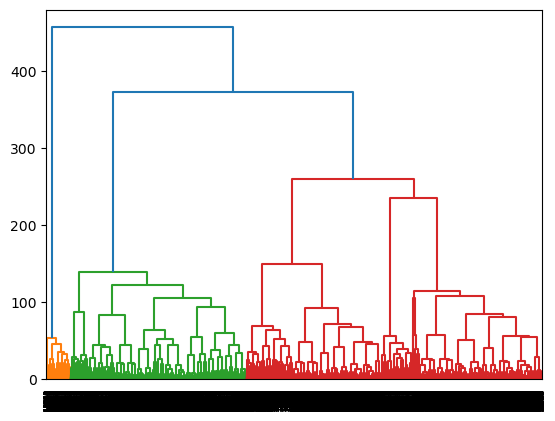

In [68]:
dend = dendrogram(wardlink) 

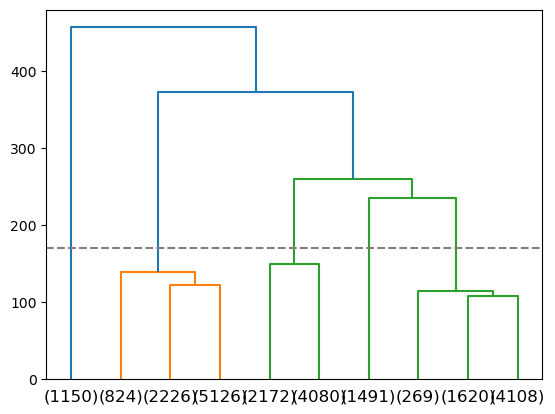

In [70]:
dendro = dendrogram(wardlink, truncate_mode = 'lastp', p = 10)
threshold = 170  
plt.axhline(y=threshold, c='gray', linestyle='--', label=f'Threshold: {threshold}')

# Creating Clusters using KMeans


In [69]:
from sklearn.cluster import KMeans 

In [70]:
wss =[] 

In [71]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(round(KM.inertia_,2))

In [72]:
wss

[415180.23,
 302729.4,
 235005.16,
 198866.42,
 170437.59,
 157821.4,
 149605.3,
 143586.88,
 138783.55,
 132571.87]

In [73]:
a=[1,2,3,4,5,6,7,8,9,10]

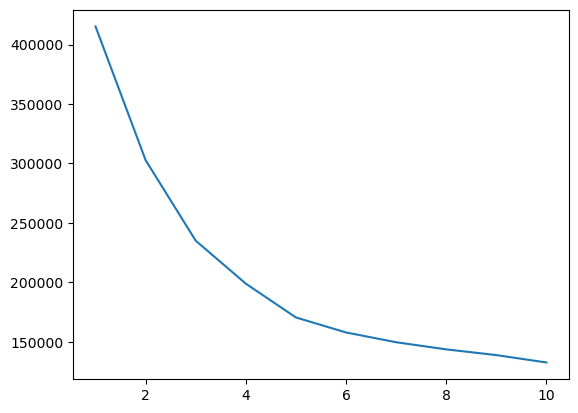

In [75]:
plt.plot(range(1,11), wss)

<Axes: >

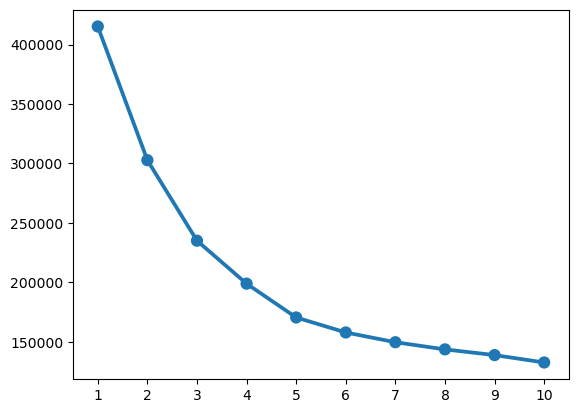

In [76]:
sns.pointplot(x=a, y=wss)

# Silhouette Analysis

In [77]:
from sklearn.metrics import silhouette_score
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for num_clusters in range_n_clusters:
    
    
    kmeans=KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df)
    cluster_labels=kmeans.labels_
    #Silhouette Score
    silhouette_avg = silhouette_score(scaled_df,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5059549056439878
For n_clusters=3, the silhouette score is 0.25722969758948794
For n_clusters=4, the silhouette score is 0.29475966408482984
For n_clusters=5, the silhouette score is 0.31886232461080305
For n_clusters=6, the silhouette score is 0.27711935822134925
For n_clusters=7, the silhouette score is 0.24462743922764754
For n_clusters=8, the silhouette score is 0.23065258641539454
For n_clusters=9, the silhouette score is 0.21526271118537196
For n_clusters=10, the silhouette score is 0.21692895354907435


# KMeans with K=5

In [78]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [79]:
silhouette_score(scaled_df,labels,random_state=1)

0.3188546254576538

In [80]:
concatenated_df["Cluster"] = labels
concatenated_df.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,InventoryType,AdType,Platform,DeviceType,Format,Cluster
0,300,250,75000,1806,325,323,1,0.0,0.35,0.0,0.309598,0.0,0.0,0,5,1,0,0,1
1,300,250,75000,1780,285,285,1,0.0,0.35,0.0,0.350877,0.0,0.0,0,10,0,1,1,1
2,300,250,75000,2727,356,355,1,0.0,0.35,0.0,0.281690,0.0,0.0,0,5,1,0,0,1
3,300,250,75000,2430,497,495,1,0.0,0.35,0.0,0.202020,0.0,0.0,0,11,1,1,1,1
4,300,250,75000,1218,242,242,1,0.0,0.35,0.0,0.413223,0.0,0.0,0,0,2,0,1,1


# Cluster Profiling

In [81]:
concatenated_df.Cluster.value_counts().sort_index()

0    1363
1    8721
2    4645
3    1338
4    6999
Name: Cluster, dtype: int64

In [83]:
clust_profile=concatenated_df.groupby('Cluster').mean()
clust_profile['freq']=concatenated_df.Cluster.value_counts().sort_index()
clust_profile

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,InventoryType,AdType,Platform,DeviceType,Format,freq
Cluster,,,,,,,,,,,,,,,,,,,
0,683.333822,117.087307,70116.449010,1.907834e+07,1.014051e+07,9.765936e+06,18648.300807,16229.895591,0.235341,12453.902316,0.190410,1.680189,0.885826,1.472487,6.536317,1.154072,0.642700,0.502568,1363
1,404.619654,167.465887,58694.709322,3.075960e+06,1.613507e+06,1.562865e+06,4541.829263,2503.492206,0.339876,1680.800011,0.351851,1.712926,0.592944,1.332760,6.508772,1.139548,0.642587,0.500975,8721
2,683.403229,325.931109,212799.138859,3.734140e+05,2.008634e+05,1.793599e+05,13582.258127,1269.937223,0.349227,828.323924,13.018078,11.409525,0.113698,4.173735,6.478364,1.145102,0.641335,0.510441,4645
3,142.008969,571.748879,75713.004484,8.758071e+05,6.119583e+05,5.163676e+05,70598.333333,7437.049342,0.282093,5366.466538,13.785283,14.944438,0.108366,3.237668,6.580717,1.128550,0.639013,0.491779,1338
4,151.405058,556.493785,76109.729961,5.171603e+04,3.258105e+04,2.459601e+04,3391.002858,375.352836,0.349410,246.318282,15.965425,14.782154,0.102049,3.316902,6.462923,1.148021,0.641806,0.495642,6999


In [71]:
df.to_excel('Clustered_dataset.xlsx')